In [3]:
import os

In [4]:
program = "./2_appx"

In [5]:
import random
import networkx as nx
random.seed(42)

def check_is_simple_and_connected(G: nx.Graph):
    is_connected = nx.is_connected(G)
    has_self_loops = any(u == v for u, v in G.edges())
    has_parallel_edges = len(G.edges()) != len(set(G.edges()))
    is_simple = not (has_self_loops or has_parallel_edges)
    return is_connected and is_simple


def generate_random_graph(file_name: str, N: int, p: float):
    """
    Generate a random graph with N nodes and probability p for edge creation.
    Erdos Renyi model.

    Parameters:
        N (int): Number of nodes in the network.
        p (float): Probability for edge creation.

    Returns:
        nx.Graph: A random graph.
    """
    generated_graph = nx.erdos_renyi_graph(N, p)

    if check_is_simple_and_connected(generated_graph):
        fhand = open(file_name, "w")
        fhand.write(
            f"{generated_graph.number_of_nodes()} {generated_graph.number_of_edges()}\n"
        )
        for edge in generated_graph.edges():
            fhand.write(f"{edge[0]} {edge[1]}\n")
        fhand.close()
    
    else:
        generate_random_graph(file_name, N, p)

In [9]:
for number_of_nodes in [10, 100, 1000, 2000, 5000, 10000, 12500, 15000, 17500, 20000]:
    print(f"Generating random graph with {number_of_nodes} nodes")
    generate_random_graph(f"random_graph.txt", number_of_nodes, 0.1)
    os.system(f"{program} < random_graph.txt")

Generating random graph with 10 nodes
Time taken: 0 milliseconds
Leaf count: 4
Generating random graph with 100 nodes
Time taken: 0 milliseconds
Leaf count: 75
Generating random graph with 1000 nodes
Time taken: 1 milliseconds
Leaf count: 958
Generating random graph with 2000 nodes
Time taken: 4 milliseconds
Leaf count: 1952
Generating random graph with 5000 nodes
Time taken: 26 milliseconds
Leaf count: 4940
Generating random graph with 10000 nodes
Time taken: 139 milliseconds
Leaf count: 9935
Generating random graph with 12500 nodes
Time taken: 118 milliseconds
Leaf count: 12435
Generating random graph with 15000 nodes
Time taken: 140 milliseconds
Leaf count: 14932
Generating random graph with 17500 nodes
Time taken: 259 milliseconds
Leaf count: 17428
Generating random graph with 20000 nodes
Time taken: 277 milliseconds
Leaf count: 19928


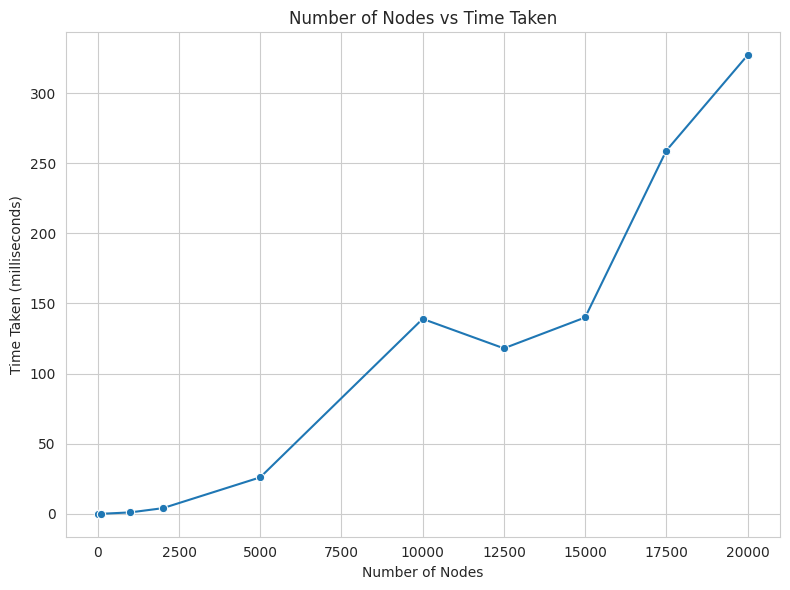

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data
number_of_nodes = [10, 100, 1000, 2000, 5000, 10000, 12500, 15000, 17500, 20000]
time_taken = [0, 0, 1, 4, 26, 139, 118, 140, 259 , 327] 

# Plot
plt.figure(figsize=(8, 6))
sns.lineplot(x=number_of_nodes, y=time_taken, marker='o')
plt.title('Number of Nodes vs Time Taken')
plt.xlabel('Number of Nodes')
plt.ylabel('Time Taken (milliseconds)')
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()


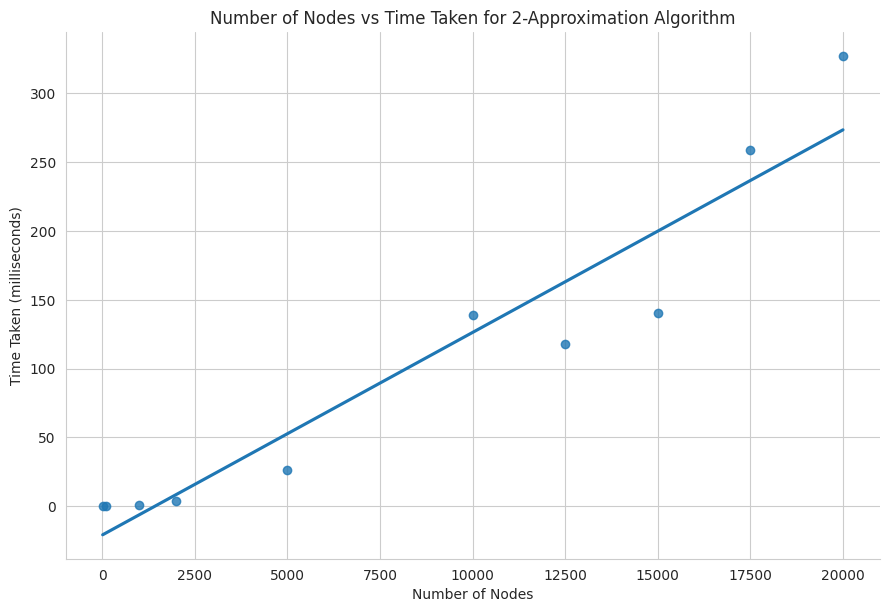

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Data
number_of_nodes = [10, 100, 1000, 2000, 5000, 10000, 12500, 15000, 17500, 20000]
time_taken = [0, 0, 1, 4, 26, 139, 118, 140, 259, 327]

# Create DataFrame
data = pd.DataFrame({'Number of Nodes': number_of_nodes, 'Time Taken (milliseconds)': time_taken})

# Plot
sns.set_style("whitegrid")
sns.lmplot(x='Number of Nodes', y='Time Taken (milliseconds)', data=data, ci=None, height=6, aspect=1.5)
plt.title('Number of Nodes vs Time Taken for 2-Approximation Algorithm')
plt.xlabel('Number of Nodes')
plt.ylabel('Time Taken (milliseconds)')

# Show plot
plt.show()